In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [16]:
df = pd.read_csv('./data/studs.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
X = df.drop(columns=['math score'], axis = 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [19]:
print("Categories in gender: ", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in test preparation course: ", end=" ")
print(df['test preparation course'].unique())

print("Categories in lunch: ", end=" ")
print(df['lunch'].unique())

Categories in gender:  ['female' 'male']
Categories in race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in test preparation course:  ['none' 'completed']
Categories in lunch:  ['standard' 'free/reduced']


In [20]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncode", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [21]:
X = preprocessor.fit_transform(X)


In [22]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [26]:
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Random Forest' : RandomForestRegressor(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'XGB' : XGBRegressor(),
    'CatBoost' : CatBoostRegressor(),
    'AdaBoost' : AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- Root mean square error: {:.4f}".format(model_train_rmse))
    print("- R2 square: {:.4f}".format(model_train_r2))

    print("#"*20)

    print('Model performance for test set')
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- Root mean square error: {:.4f}".format(model_test_rmse))
    print("- R2 square: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*20)
    print('\n')

Linear Regression
Model performance for training set
- Mean absolute error: 4.2723
- Root mean square error: 5.3402
- R2 square: 0.8735
####################
Model performance for test set
- Mean absolute error: 4.2253
- Root mean square error: 5.4214
- R2 square: 0.8792


Decision Tree
Model performance for training set
- Mean absolute error: 0.0187
- Root mean square error: 0.2795
- R2 square: 0.9997
####################
Model performance for test set
- Mean absolute error: 6.2950
- Root mean square error: 8.0408
- R2 square: 0.7343


Ridge
Model performance for training set
- Mean absolute error: 4.2650
- Root mean square error: 5.3233
- R2 square: 0.8743
####################
Model performance for test set
- Mean absolute error: 4.2111
- Root mean square error: 5.3904
- R2 square: 0.8806


Lasso
Model performance for training set
- Mean absolute error: 5.2063
- Root mean square error: 6.5938
- R2 square: 0.8071
####################
Model performance for test set
- Mean absolute error

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending = False)

,Model_name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879216
4,Random Forest,0.853516
7,CatBoost,0.851632
8,AdaBoost,0.847364
6,XGB,0.827797
3,Lasso,0.825320
5,K-Neighbors Regressor,0.783497
1,Decision Tree,0.734300


In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.92


Text(0, 0.5, 'Predicted')

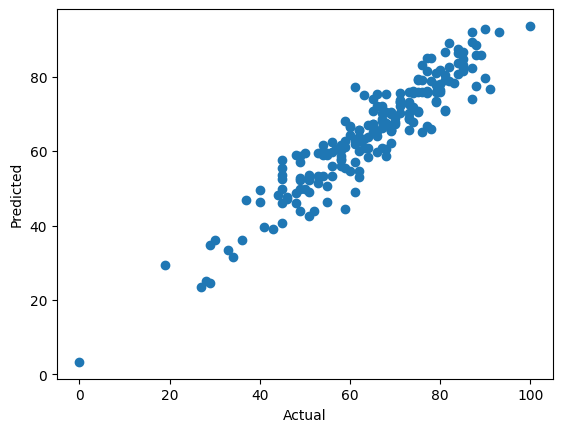

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

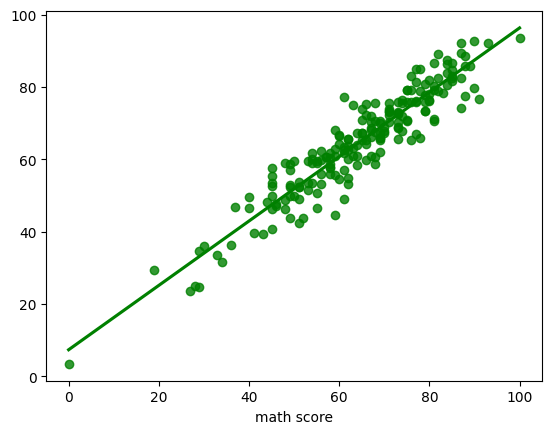

In [33]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='green')

In [34]:
pred_diff = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference' : y_test-y_pred})
pred_diff

,Actual value,Predicted value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
